In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/certficate/Star3642_balanced.csv")

# About Data
# Vmag: Visual Apparent Magnitude of the Star
# Plx : Distance Between the Star and the Earth
# e_Plx:Standard Error of Plx (Drop the Row if you find the e_Plx is too high!)
# B-V : B-V color index. (A hot star has a B-V color index close to 0 or negative, while a cool star has a B-V color index close to 2.0. Other stars are somewhere in between.)
# SpType: Spectral type
# Amag: Absolute Magnitude of the Star
# TargetClass: Whether the Star is Dwarf (0) or Giant (1)

In [ ]:
data

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1
...,...,...,...,...,...,...,...
3637,7.29,3.26,0.95,1.786,K4III,14.856089,0
3638,8.29,6.38,1.00,0.408,F2IV/V,17.314104,1
3639,6.11,2.42,0.79,1.664,M0/M1IIICNp,13.029078,0
3640,7.94,4.94,2.90,0.210,A5V,16.408636,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         3642 non-null   float64
 1   Plx          3642 non-null   float64
 2   e_Plx        3642 non-null   float64
 3   B-V          3642 non-null   float64
 4   SpType       3642 non-null   object 
 5   Amag         3642 non-null   float64
 6   TargetClass  3642 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 199.3+ KB


In [ ]:
data.describe()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
count,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000
mean,8.120530,7.606153,1.176568,0.827077,16.427388,0.500000
std,1.338875,11.924052,0.919999,0.436699,2.428144,0.500069
min,0.450000,-6.820000,0.470000,-0.196000,2.820000,0.000000
25%,7.370000,2.740000,0.840000,0.487250,15.150312,0.000000
50%,8.390000,4.950000,1.040000,0.867000,16.392485,0.500000
75%,9.060000,8.670000,1.270000,1.136000,18.029836,1.000000
max,12.490000,280.270000,30.290000,2.530000,29.249165,1.000000


In [ ]:
data.columns

Index(['Vmag', 'Plx', 'e_Plx', 'B-V', 'SpType', 'Amag', 'TargetClass'], dtype='object')

In [ ]:
data["SpType"].value_counts()

K0III          293
K1III          200
K2III          156
G8III          135
F5V            125
              ... 
B9.5IV           1
B0Ibp            1
M0V              1
B1Vv SB          1
M0/M1IIICNp      1
Name: SpType, Length: 584, dtype: int64

In [ ]:
data.isnull().sum()

Vmag           0
Plx            0
e_Plx          0
B-V            0
SpType         0
Amag           0
TargetClass    0
dtype: int64

<ipython-input-249-9fa67090a602>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


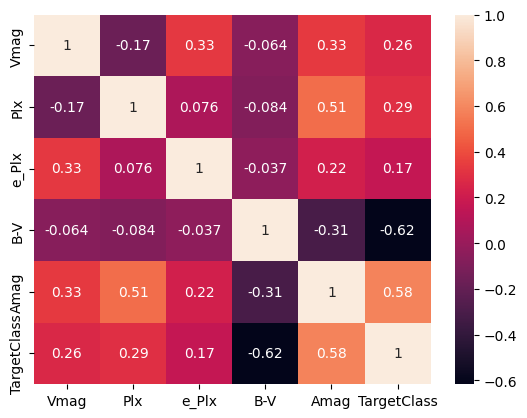

In [ ]:
sns.heatmap(data.corr(), annot=True)
plt.show()

Vmag              Axes(0.125,0.798085;0.133621x0.0819149)
Plx            Axes(0.285345,0.798085;0.133621x0.0819149)
e_Plx           Axes(0.44569,0.798085;0.133621x0.0819149)
B-V            Axes(0.606034,0.798085;0.133621x0.0819149)
Amag           Axes(0.766379,0.798085;0.133621x0.0819149)
TargetClass       Axes(0.125,0.699787;0.133621x0.0819149)
dtype: object

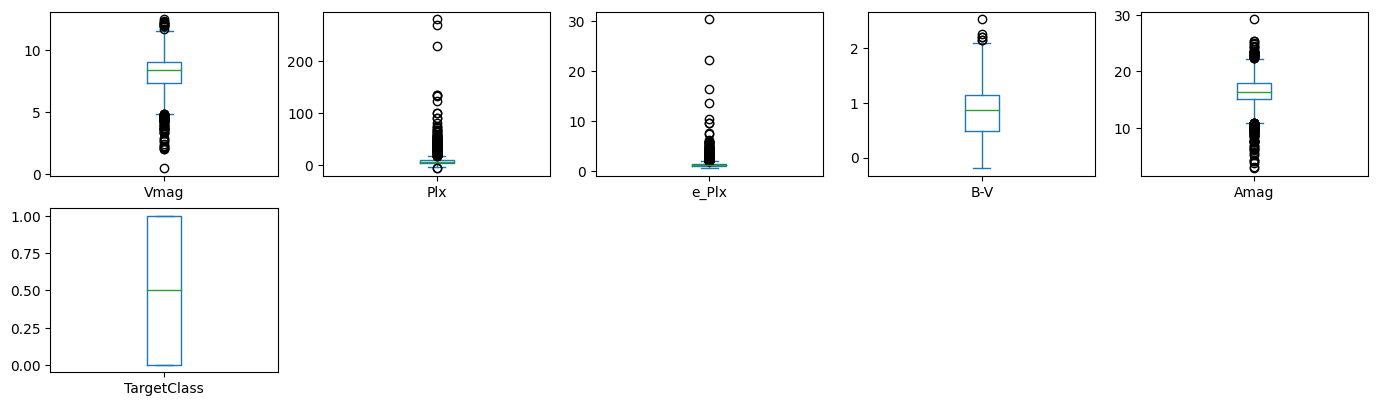

In [ ]:
data.plot(kind='box', subplots=True, layout=(8,5), figsize=(17,20))

In [ ]:
data=data[data['Vmag']<data['Vmag'].quantile(0.9)]
data=data[data['Plx']<data['Plx'].quantile(0.9)]
data=data[data['e_Plx']<data['e_Plx'].quantile(0.9)]
data=data[data['B-V']<data['B-V'].quantile(0.9)]
data=data[data['Amag']<data['Amag'].quantile(0.9)]

Vmag              Axes(0.125,0.798085;0.133621x0.0819149)
Plx            Axes(0.285345,0.798085;0.133621x0.0819149)
e_Plx           Axes(0.44569,0.798085;0.133621x0.0819149)
B-V            Axes(0.606034,0.798085;0.133621x0.0819149)
Amag           Axes(0.766379,0.798085;0.133621x0.0819149)
TargetClass       Axes(0.125,0.699787;0.133621x0.0819149)
dtype: object

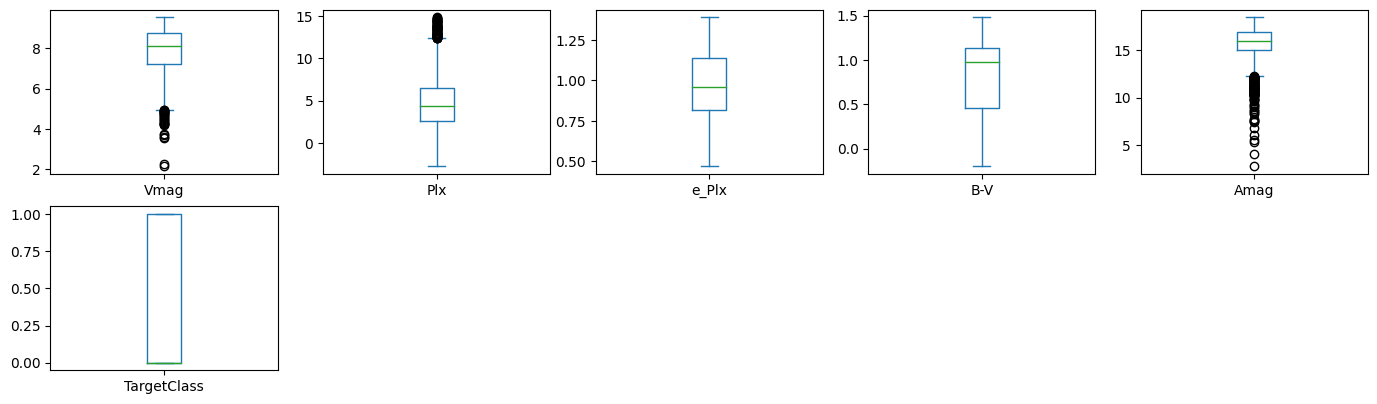

In [ ]:
data.plot(kind='box', subplots=True, layout=(8,5), figsize=(17,20))

In [ ]:
data.shape


(2138, 7)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder() 

for c in data.columns[0:]:  
    if(data[c].dtype=='object'): 
        data[c] = encoder.fit_transform(data[c])
    else: 
        data[c] = data[c]

data.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,394,16.678352,0
1,8.70,2.31,1.29,-0.045,82,15.518060,0
2,5.77,5.50,1.03,0.855,255,14.471813,0
3,6.72,5.26,0.74,-0.015,122,15.324928,1
5,4.90,8.37,0.76,-0.091,140,14.513628,0


In [ ]:
SpType_le = LabelEncoder()  
data['SpType'] = SpType_le.fit_transform(data["SpType"])

In [ ]:
x = data.drop("TargetClass", axis = 1).values
y = data['TargetClass'].values 

In [ ]:
x_train,x_test ,y_train,y_test = train_test_split(x,y , test_size= 0.25 , random_state=42)

In [ ]:
x_train.shape

(1603, 6)

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr.score(x_train , y_train)

0.8702432938240798

In [ ]:
lr.score(x_test , y_test)

0.8878504672897196

In [ ]:
parameters = {
    "algorithm" : "auto",
    "leaf_size" : 30,
    "metric" : "euclidean",
    "metric_params" : None,
    "n_jobs" : 1,
    "n_neighbors" : 6,
    "p": 2,
    "weights" : "uniform"
}


In [ ]:
knn = KNeighborsClassifier(**parameters)

In [ ]:
knn.fit(x_train , y_train)

KNeighborsClassifier(metric='euclidean', n_jobs=1, n_neighbors=6)

In [ ]:
knn.score(x_train , y_train)

0.9263880224578914

In [ ]:
knn.score(x_test , y_test)

0.9102803738317757

In [ ]:
KNN_Predictions = knn.predict(x_test)

In [ ]:
dt =DecisionTreeClassifier(max_features=6 ,    max_depth=10)

In [ ]:
dt.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=10, max_features=6)

In [ ]:
dt.score(x_train , y_train)

0.9800374298190893

In [ ]:
dt.score(x_test , y_test)

0.8934579439252337

In [ ]:
parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 50, 
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth': 6,
              'max_leaf_nodes': None}

In [ ]:
rf = RandomForestClassifier(**parameters)

In [ ]:
rf.fit(x_train , y_train)
rf.score(x_train , y_train)

0.9045539613225203

In [ ]:
rf.fit(x_test,y_test)

RandomForestClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=10,
                       n_estimators=50)

In [ ]:
rf.score(x_test , y_test)

0.9214953271028037

In [ ]:
RF_predictions = rf.predict(x_test)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
acc_score = accuracy_score(y_test,RF_predictions)

In [ ]:
print("Accuracy = ",acc_score)

Accuracy =  0.9214953271028037


In [ ]:
prec_score = precision_score(y_test,RF_predictions)
print('Precision = ',prec_score,'\n')

Precision =  0.9016393442622951 



In [ ]:
rec_score = recall_score(y_test,RF_predictions)
print('Recall = ',rec_score,'\n')


Recall =  0.873015873015873 



In [ ]:
fscore = f1_score(y_test,RF_predictions)
print('F1 score = ',fscore)

F1 score =  0.8870967741935485


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

matrix = confusion_matrix(y_test, RF_predictions,labels=[1,0])
print('<------- Confusion matrix ------->\n', matrix)

<------- Confusion matrix ------->
 [[165  24]
 [ 18 328]]


In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test, RF_predictions,labels=[1,0]).reshape(-1)
print(f'<-------- Outcome values -------->\n True Positive (TP) \t: {tp} \n False Negative (FN) \t: {fn} \n False Positive (FP) \t: {fp} \n True Negative (TN) \t: {tn}')

<-------- Outcome values -------->
 True Positive (TP) 	: 165 
 False Negative (FN) 	: 24 
 False Positive (FP) 	: 18 
 True Negative (TN) 	: 328


In [ ]:
matrix = classification_report(y_test, RF_predictions,labels=[1,0])
print('<--------------- Classification report --------------->\n', matrix)

<--------------- Classification report --------------->
               precision    recall  f1-score   support

           1       0.90      0.87      0.89       189
           0       0.93      0.95      0.94       346

    accuracy                           0.92       535
   macro avg       0.92      0.91      0.91       535
weighted avg       0.92      0.92      0.92       535



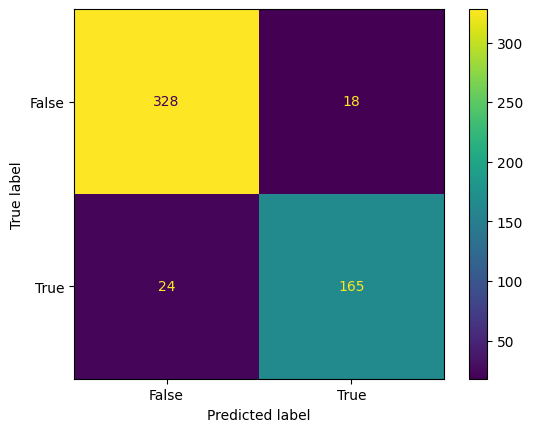

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, RF_predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
new_features = np.column_stack((x_test, x_test[:, 0] *x_test[:, 1],x_test[:, 0]**2, x_test[:, 1]**2))

In [ ]:
rf.fit(new_features, y_test) 

RandomForestClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=10,
                       n_estimators=50)

<ipython-input-295-66e7614c9f1b>:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


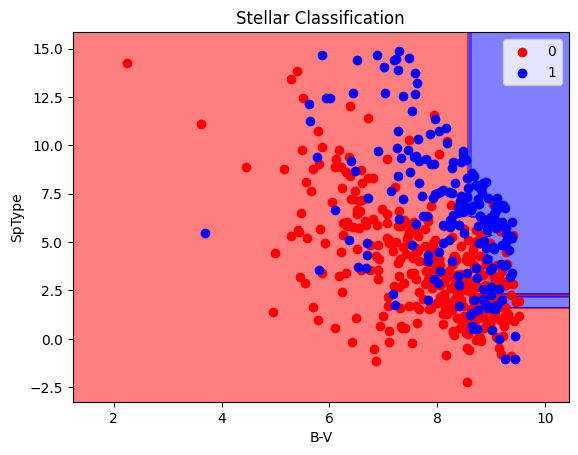

In [ ]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

from matplotlib.colors import ListedColormap

x_set, y_set = x_test[:, :2], y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1, stop = x_set[:,0].max()+1, step = 0.1),
                     np.arange(start = x_set[:,1].min()-1, stop = x_set[:,1].max()+1, step = 0.1))

placeholders = np.zeros((x1.ravel().shape[0], 7))
x3 = np.c_[x1.ravel(), x2.ravel(), placeholders]
Z = rf.predict(x3)
Z = Z.reshape(x1.shape)
plt.contourf(x1, x2, Z, alpha = 0.5, cmap = ListedColormap(('red','blue')))

for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red','blue'))(i), label = j)
  
plt.title('Stellar Classification')
plt.xlabel('B-V')
plt.ylabel('SpType')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=5, learning_rate=0.2)
ada.fit(x_train , y_train)